In [1]:
%run my_imports.py

# Figure on jupyter notebook
%matplotlib inline

# Automatically reload modules
%load_ext autoreload
%autoreload 2

In [2]:
folder_selected = r'D:\results\Results_ANS\subjectFolderExperiment'
# epochs_breathing_amplitude = loading_from_listfolder(folder_selected,'epochs_resp_amplitude')
epochs_breathing_phase = loading_from_listfolder(folder_selected,'epochs_resp_phase')

folderGA = os.path.join(folder_selected,'GA')

if not os.path.exists(folderGA):
    os.makedirs(folderGA)
    print('**** Create Grand Average folder ****')
else:
    print('**** Grand Average folder exists already ****')

D:\results\Results_ANS\subjectFolderExperiment\s0
D:\results\Results_ANS\subjectFolderExperiment\s01
D:\results\Results_ANS\subjectFolderExperiment\s02
D:\results\Results_ANS\subjectFolderExperiment\s03
D:\results\Results_ANS\subjectFolderExperiment\s04
D:\results\Results_ANS\subjectFolderExperiment\s05
D:\results\Results_ANS\subjectFolderExperiment\s06
D:\results\Results_ANS\subjectFolderExperiment\s07
D:\results\Results_ANS\subjectFolderExperiment\s08
D:\results\Results_ANS\subjectFolderExperiment\s09
D:\results\Results_ANS\subjectFolderExperiment\s10
D:\results\Results_ANS\subjectFolderExperiment\s11
D:\results\Results_ANS\subjectFolderExperiment\s12
D:\results\Results_ANS\subjectFolderExperiment\s13
D:\results\Results_ANS\subjectFolderExperiment\s14
D:\results\Results_ANS\subjectFolderExperiment\s15
D:\results\Results_ANS\subjectFolderExperiment\s16
D:\results\Results_ANS\subjectFolderExperiment\s17
D:\results\Results_ANS\subjectFolderExperiment\s18
D:\results\Results_ANS\subjectFo

# Non Phase-locked cue

MI_START
MI_STOP: 33/33


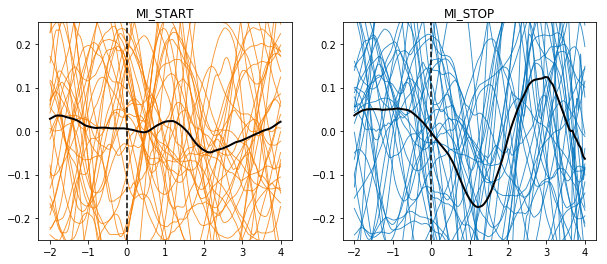

In [12]:
from utils.utils_normalization import zscore_over_trials


listEventOfInterest_nonlocked = {'MI_START':40,'MI_STOP':55}

colormap = [[0.9706,0.4902,0],[0,0.4471,0.7412]];

fig = plt.figure(figsize=(10, 4))

for iEvent,event_type in enumerate(listEventOfInterest_nonlocked):
    print(event_type)
    data_resp_average_GA_list = []
    axs=fig.add_subplot(121+iEvent)
    for iEpoch,theseEpochs in enumerate(epochs_breathing_amplitude):
        b = "Subject: " + str(iEpoch) + '/'+ str(len(epochs_breathing_amplitude)-1)
        print (b, end="\r")   
        picks_resp= theseEpochs.ch_names.index("AUX3filter")
        data_resp = np.squeeze(theseEpochs[event_type].get_data(picks=picks_resp))
        data_resp = zscore_over_trials(data_resp)
        data_resp_average = np.mean(data_resp,axis=0)
        axs.plot(theseEpochs.times,data_resp_average,color=colormap[iEvent],linewidth=0.9,alpha = 0.8)   
        data_resp_average_GA_list.append(data_resp_average)
    axs.set_title(event_type)
    axs.axvline(x=0,color='k', linestyle='--')
    data_resp_average_GA = np.mean(data_resp_average_GA_list,axis=0)
    axs.plot(theseEpochs.times,data_resp_average_GA,color='black',linewidth=2)
    axs.set_ylim([-0.25,0.25])

In [11]:
np.shape(data_resp_average_GA_list)

(34, 3073)

# Phase-locked cue

In [ ]:
from utils.utils_normalization import zscore_over_trials


listEventOfInterest_start = {'CUE_START_INHALE':43,
                       'CUE_START_EXHALE':44}

listEventOfInterest_stop = {'CUE_STOP_INHALE':50,
                 'CUE_STOP_EXHALE':51}

colormap = [[0.9706,0.4902,0],[0,0.4471,0.7412]];
colormap_av = [[0.9706,0.2902,0],[0,0.4471,0.9412]];

path = os.path.join(folderGA,'Respiration_data')



fig = plt.figure(figsize=(10, 4))

axs=fig.add_subplot(121)
for iEpoch,theseEpochs in enumerate(epochs_breathing_amplitude):
    b = "Subject: " + str(iEpoch) + '/'+ str(len(epochs_breathing_amplitude)-1)
    print (b, end="\r")
    for iEvent,event_type in enumerate(listEventOfInterest_start):
        picks_resp= theseEpochs.ch_names.index("AUX3filter")
        data_resp = np.squeeze(theseEpochs[event_type].get_data(picks=picks_resp))
        data_resp = zscore_over_trials(data_resp)
        data_resp_average = np.mean(data_resp,axis=0)
        axs.plot(theseEpochs.times,data_resp.T,color=colormap[iEvent],linewidth=0.1,alpha = 0.6)
        if iEpoch == 0:
            label = event_type
        else:
            label = None
        axs.plot(theseEpochs.times,data_resp_average,color=colormap_av[iEvent],linewidth=1,label=label,alpha = 0.9)

axs.set_ylim([-3,3])
axs.set_xlim([-2,3])
axs.set_title('CUE_START')
axs.legend()
axs.axvline(x=0,color='k', linestyle='--')

# axs=fig.add_subplot(122)
# for iEpoch,theseEpochs in enumerate(epochs_breathing_amplitude):
#     for iEvent,event_type in enumerate(listEventOfInterest_stop):
#         picks_resp = theseEpochs.ch_names.index("AUX3filter")
#         data_resp = np.squeeze(theseEpochs[event_type].get_data(picks=picks_resp))
#         data_resp = zscore_over_trials(data_resp)
#         data_resp_average = np.mean(data_resp,axis=0)
#         axs.plot(theseEpochs.times,data_resp.T,color=colormap[iEvent],linewidth=0.1,alpha = 0.7)
#         if iEpoch == 0:
#             label = event_type
#         else:
#             label = None
#         axs.plot(theseEpochs.times,data_resp_average,color=colormap_av[iEvent],linewidth=1,label=label,alpha = 1)
            
# axs.set_ylim([-3,3])
# axs.set_xlim([-2,3])
# axs.set_title('CUE_STOP')
# axs.legend()
# axs.axvline(x=0,color='k', linestyle='--')

In [ ]:
print('Saving Figure')
name_fig = 'respiration_amplitude2'
saving_figure(name_fig,path,fig)

# Mean and Deviation calculation in GA

In [ ]:
listEventOfInterest_start = {'CUE_START_INHALE':43,
                       'CUE_START_EXHALE':44}

index = np.where(epochs_breathing_phase[0].times == 0)[0]
degrees_mean_dict = dict()    
for iEvent,event_type in enumerate(listEventOfInterest_start):
    degrees_mean = []
    print(event_type)
    for iEpoch,theseEpochs in enumerate(epochs_breathing_phase):
        picks_resp= theseEpochs.ch_names.index("AUX3filter")
        b = "Subject: " + str(iEpoch) + '/'+ str(len(epochs_breathing_phase)-1)
        print (b, end="\r")
        
        data_phase = np.squeeze(theseEpochs[event_type].get_data(picks=picks_resp)).real
        radians = data_phase[:,index]+np.pi
        degrees = np.rad2deg(radians) 
        degrees_mean.append(np.mean(degrees,axis=0))
    degrees_mean_dict.update({event_type:np.asarray(degrees_mean)})

In [ ]:
for iEvent,event_type in enumerate(listEventOfInterest_start):
    mu = np.mean(degrees_mean_dict[event_type])
    dev = np.std(degrees_mean_dict[event_type])
    print(event_type,mu,dev)

from scipy import stats
stats.ttest_ind(degrees_mean_dict['CUE_START_INHALE'],degrees_mean_dict['CUE_START_EXHALE'])

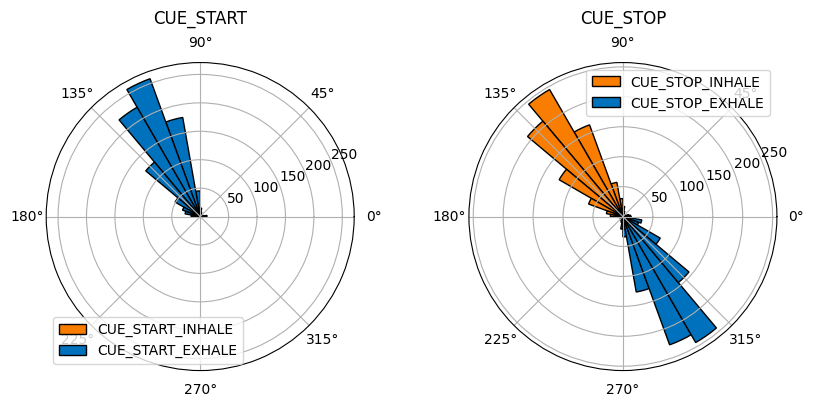

In [5]:

listEventOfInterest_start = {'CUE_START_INHALE':43,
                       'CUE_START_EXHALE':44}

listEventOfInterest_stop = {'CUE_STOP_INHALE':50,
                 'CUE_STOP_EXHALE':51}

colormap = [[0.9706,0.4902,0],[0,0.4471,0.7412]];


fig = plt.figure(figsize=(10, 4))
plt.style.use('default')
bin_size = 10
path = os.path.join(folderGA,'Respiration_data')

ax = fig.add_subplot(121, projection='polar')
ax.set_theta_zero_location("E")
ax.set_title('CUE_START', y=1.1)


epochs_concat = []
for iEpoch,theseEpochs in enumerate(epochs_breathing_phase):
    theseEpochs = theseEpochs.pick_channels(["AUX3filter"])
    epochs_concat.append(theseEpochs)

epochs_concat = mne.concatenate_epochs(epochs_concat)
index = np.where(epochs_concat.times == 0)[0]

picks_resp=epochs_concat[0].ch_names.index("AUX3filter")
for iEvent,event_type in enumerate(listEventOfInterest_start):
    data_phase = np.squeeze(epochs_concat[event_type].get_data(picks=picks_resp)).real
    radians = data_phase[:,index]
    degrees = np.rad2deg(radians) 
    a , b=np.histogram(degrees, bins=np.arange(0, 360+bin_size, bin_size))
    centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])
    ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color=colormap[iEvent], edgecolor='k',label=event_type)
ax.legend()
    
ax = fig.add_subplot(122, projection='polar')
ax.set_theta_zero_location("E")
ax.set_title('CUE_STOP', y=1.1)
for iEvent,event_type in enumerate(listEventOfInterest_stop):
    data_phase = np.squeeze(epochs_concat[event_type].get_data(picks=picks_resp)).real
    radians = data_phase[:,index]+ np.pi
    degrees = np.rad2deg(radians) 
    a , b=np.histogram(degrees, bins=np.arange(0, 360+bin_size, bin_size))
    centers = np.deg2rad(np.ediff1d(b)//2 + b[:-1])
    ax.bar(centers, a, width=np.deg2rad(bin_size), bottom=0.0, color=colormap[iEvent], edgecolor='k',label=event_type)
ax.legend()
plt.show()

# name_fig = 'respiration_phase'
# saving_figure(name_fig,path,fig)

In [ ]:
listEventOfInterest = {'CUE_START_INHALE':43,
                 'CUE_START_EXHALE':44,
                 'CUE_STOP_INHALE':50,
                 'CUE_STOP_EXHALE':51}

fig = plt.figure(figsize=(10, 4))


latency_peak_GA = []
for iEvent,event_type in enumerate(listEventOfInterest):
    print(event_type)
    ax=fig.add_subplot(221+iEvent)
    for iEpoch,theseEpochs in enumerate(epochs_breathing_amplitude):
        index = np.where(theseEpochs.times == 0)[0][0]
        index2 = np.where(theseEpochs.times == 2)[0][0]
        picks_resp= theseEpochs.ch_names.index("AUX3filter")
        data_resp = np.squeeze(theseEpochs[event_type].get_data(picks=picks_resp))
        data_resp = zscore_over_trials(data_resp)
        if iEvent == 0 or iEvent == 2:
            peak = np.argmax(data_resp[:,index:index2],axis=1)
        else:
            peak = np.argmin(data_resp[:,index:index2],axis=1)
        latency_peak = theseEpochs.times[index+peak]*1000
        if iEpoch == 0:
            latency_peak_GA = latency_peak
        else:
            latency_peak_GA = np.concatenate((latency_peak_GA,latency_peak))  
        
    latency_all = np.asarray(latency_peak_GA)
    ax.hist(latency_all,20)
    ax.set_xlim([0,2000])
    ax.set_title(event_type,y=0.8)
    
    
print('Saving Figure')
path = os.path.join(folderGA,'Respiration_data')
name_fig = 'respiration_peak_latency'
saving_figure(name_fig,path,fig)